In [66]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [67]:
num_classes = 10
input_shape = (28, 28, 1)

# Load data and split it to train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale pictures (values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [68]:
model = keras.Sequential([
    # First Layer
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Second Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Third Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Fourth Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


batch_size = 8
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.20, callbacks=[early_stopping])


Epoch 1/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.5141 - accuracy: 0.4482 - val_loss: 1.2689 - val_accuracy: 0.5472
Epoch 2/10
5000/5000 [==============================] - 23s 5ms/step - loss: 1.0954 - accuracy: 0.6114 - val_loss: 1.0404 - val_accuracy: 0.6297
Epoch 3/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.9370 - accuracy: 0.6703 - val_loss: 0.9783 - val_accuracy: 0.6682
Epoch 4/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.8452 - accuracy: 0.7060 - val_loss: 0.8981 - val_accuracy: 0.6904
Epoch 5/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.7729 - accuracy: 0.7265 - val_loss: 0.9375 - val_accuracy: 0.6734
Epoch 6/10
5000/5000 [==============================] - 25s 5ms/step - loss: 0.7192 - accuracy: 0.7493 - val_loss: 0.8745 - val_accuracy: 0.7026
Epoch 7/10
5000/5000 [==============================] - 26s 5ms/step - loss: 0.6737 - accuracy: 0.7634 - val_loss: 0.9166 - val_ac

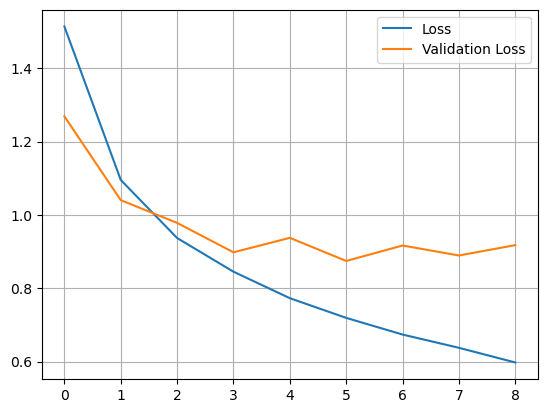

In [70]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [71]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.9032068252563477
Test accuracy: 0.6983000040054321


1/1 [==============================] - 0s 38ms/step


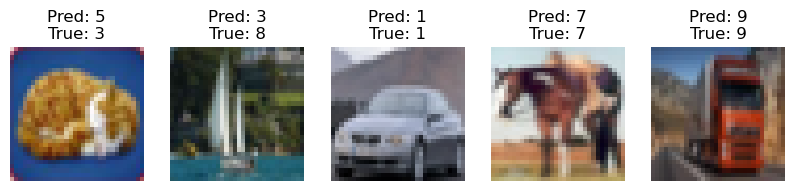

In [72]:
import random

# Choose random images
num_images = 5
indices = random.sample(range(len(x_test)), num_images)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Predict with the model
predictions = model.predict(sample_images)

# Show the images and predictions
fig, axes = plt.subplots(1, num_images, figsize=(10,3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(sample_labels[i])}")
    ax.axis('off')

plt.show()
